In [1]:
from lsst.sims.featureScheduler.modelObservatory import Model_observatory
import numpy as np
from lsst.sims.almanac import Almanac
from lsst.sims.cloudModel import CloudData
%matplotlib inline
import matplotlib.pylab as plt
from scipy.stats import binned_statistic
from astropy.time import Time

from datetime import datetime

In [2]:
mjd_start=59853.5
cloud_limit=0.3
mjd_start_time = Time(mjd_start, format='mjd')

almanac = Almanac(mjd_start=mjd_start)
cloud_data = CloudData(mjd_start_time, offset_year=0)

In [3]:
mjds = np.arange(mjd_start, mjd_start+365.25*10, 1/24/10.)
times = Time(mjds, format='mjd')

bulk_cloud = [cloud_data(time) for time in times]


In [4]:
#plt.plot(mjds, bulk_cloud, 'ko')

In [5]:
sun_moon_info = almanac.get_sun_moon_positions(mjds)
good = np.where(sun_moon_info['sun_alt'] < np.radians(-18.))[0]

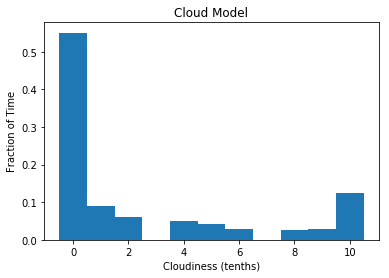

In [6]:
_temp = plt.hist(np.array(bulk_cloud)[good]*10, bins=np.arange(-.05, 1.15, .1)*10,
                 density=True)
plt.xlabel('Cloudiness (tenths)')
plt.ylabel('Fraction of Time')
plt.title('Cloud Model')
plt.savefig('cloud_levels.pdf')

In [7]:
print('Fraction of time we set as clouded out', np.where(np.array(bulk_cloud)[good] > cloud_limit)[0].size/good.size)

Fraction of time we set as clouded out 0.298292893913822


In [16]:
good = np.where((sun_moon_info['sun_alt'] < np.radians(-18.)) & (np.array(bulk_cloud) < cloud_limit))[0]

almanac_indx = almanac.mjd_indx(mjds)
nights = almanac.sunsets['night'][almanac_indx]

In [18]:
times = np.ones(np.size(good))*(mjds[1]-mjds[0])*24

In [19]:
n = nights[good] % 365
# fudge the bins because there's something weird going on at the start I don't want to bother wth
bins = np.arange(5., 366, 1)
hours_available, be, bi = binned_statistic(n, times, bins=bins, statistic=np.sum)

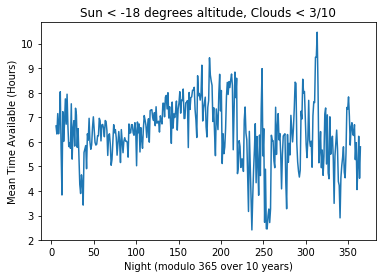

In [20]:
night_binned = (be[1:]+be[:-1])/2
plt.plot(night_binned, hours_available/10.)
plt.xlabel('Night (modulo 365 over 10 years)')
plt.ylabel('Mean Time Available (Hours)')
plt.title('Sun < -18 degrees altitude, Clouds < 3/10')
plt.savefig('hours_pernight.pdf')